# Visual story telling part 1: green buildings

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
df = pd.read_csv('greenbuildings.csv')

# Removed buildings with an occupancy rate of less than 10%
df_clean = df[df['leasing_rate'] >= 10]

### We can start by validating what the Excel Guru found in his analysis. 

The median rent for green buildings is indeed $2.6 higher than the non-green ones

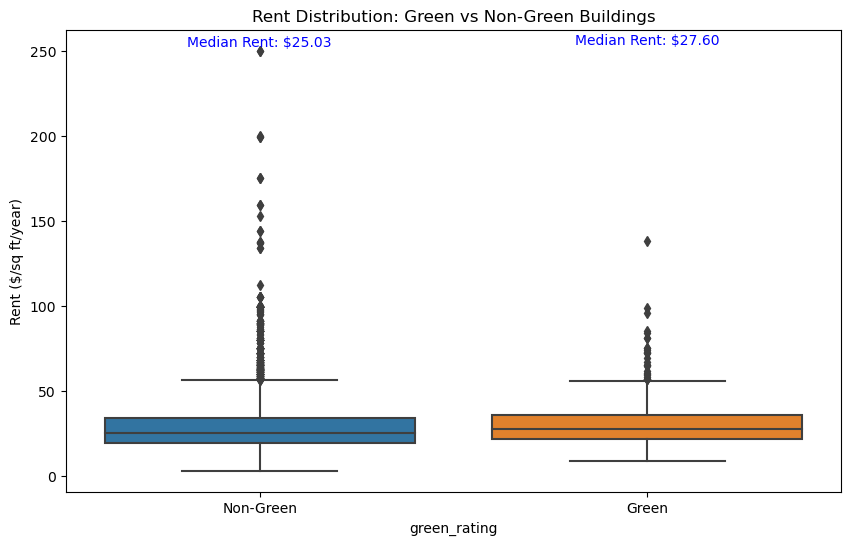

In [10]:
# Visualize the rent distribution for green vs. non-green buildings with data labels
plt.figure(figsize=(10,6))
sns.boxplot(x='green_rating', y='Rent', data=df_clean)
plt.title("Rent Distribution: Green vs Non-Green Buildings")
plt.xticks([0, 1], ['Non-Green', 'Green'])
plt.ylabel('Rent ($/sq ft/year)')

# Calculate median rent values for green and non-green buildings
green_median_rent = df_clean[df_clean['green_rating'] == 1]['Rent'].median()
non_green_median_rent = df_clean[df_clean['green_rating'] == 0]['Rent'].median()

# Calculate valid y position for data labels
y_pos_non_green = df_clean['Rent'].max() + 1
y_pos_green = df_clean['Rent'].max() + 2

# Add data labels for median rent values
plt.text(0, y_pos_non_green, f'Median Rent: ${non_green_median_rent:.2f}', ha='center', va='bottom', color='blue')
plt.text(1, y_pos_green, f'Median Rent: ${green_median_rent:.2f}', ha='center', va='bottom', color='blue')

plt.show()

### Let's look at the variation of rent by each of the variables.

Starting with the numerical variables first:

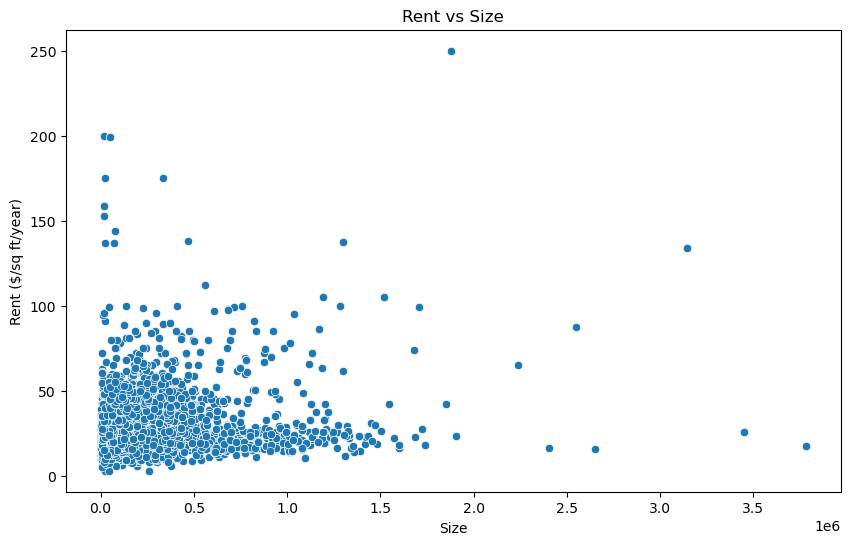

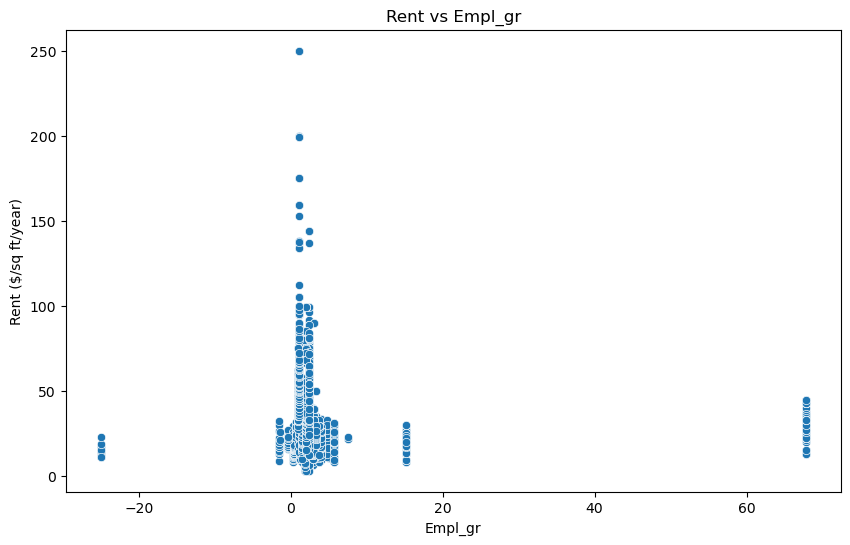

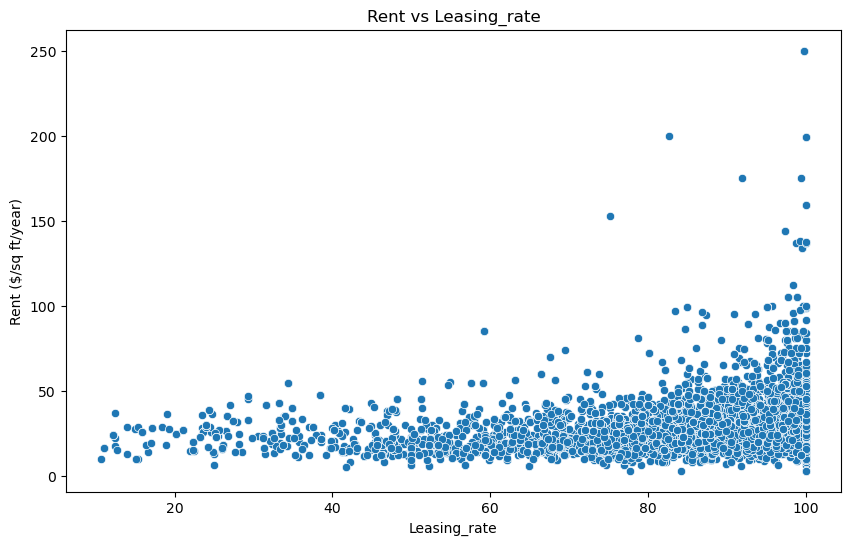

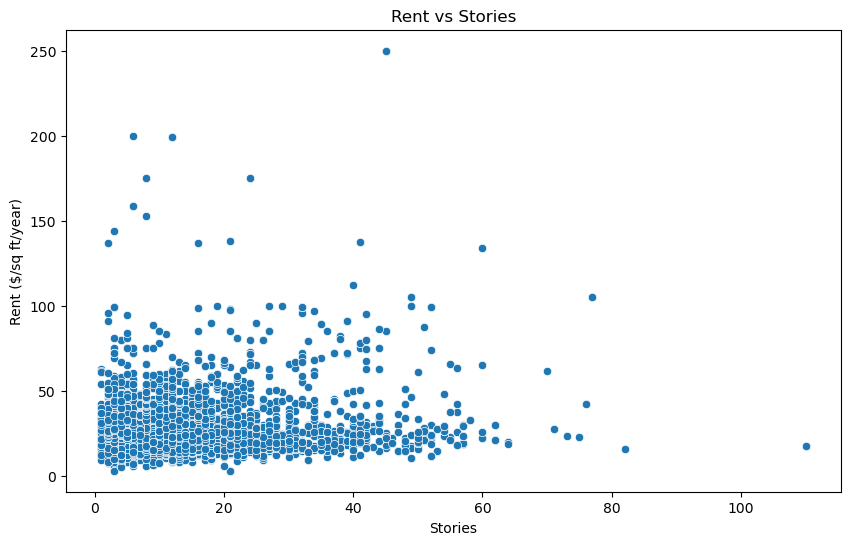

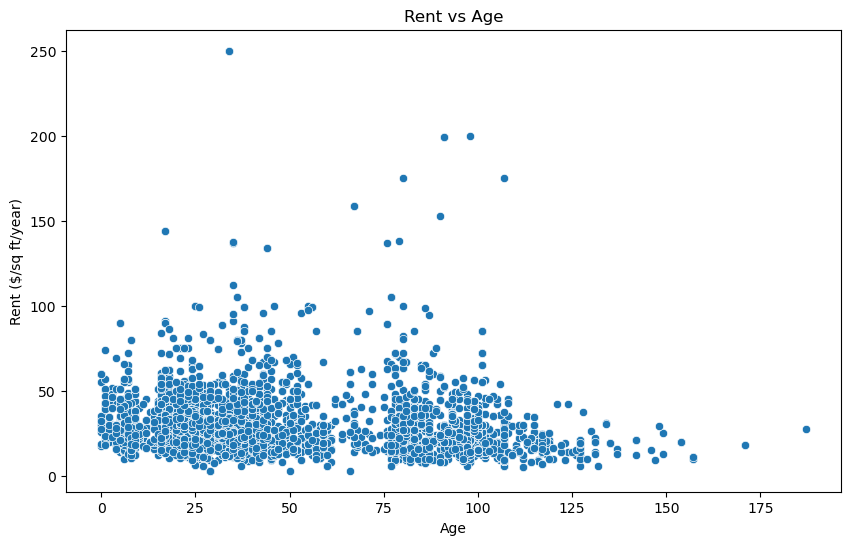

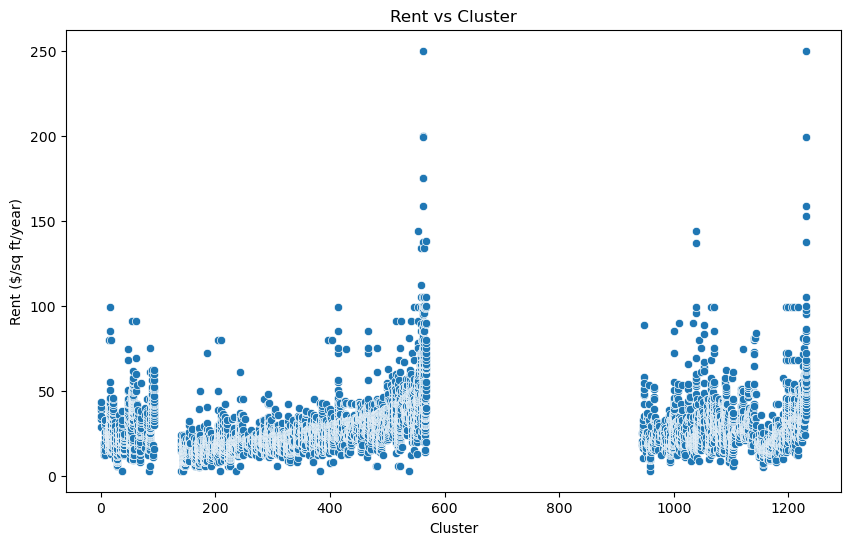

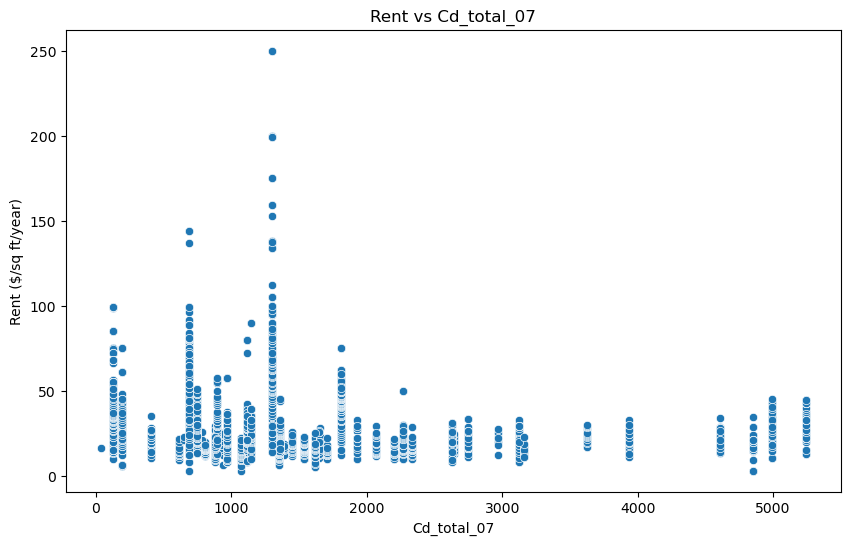

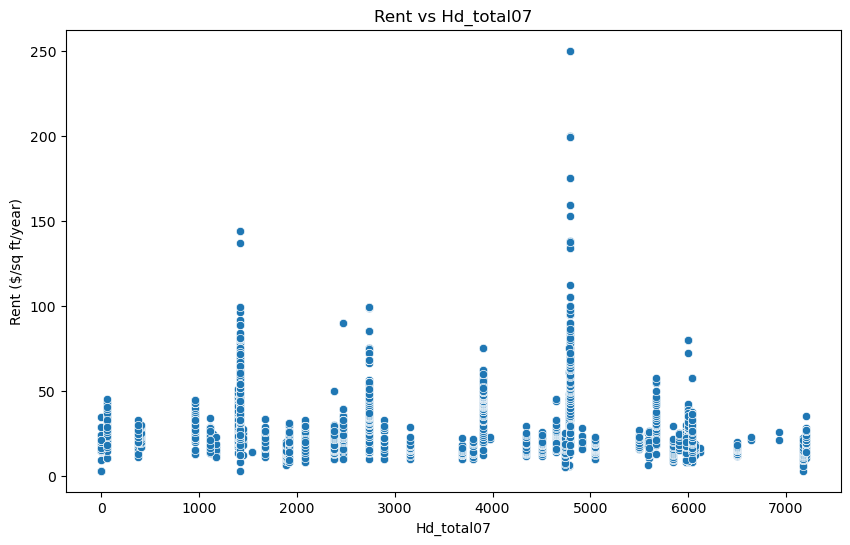

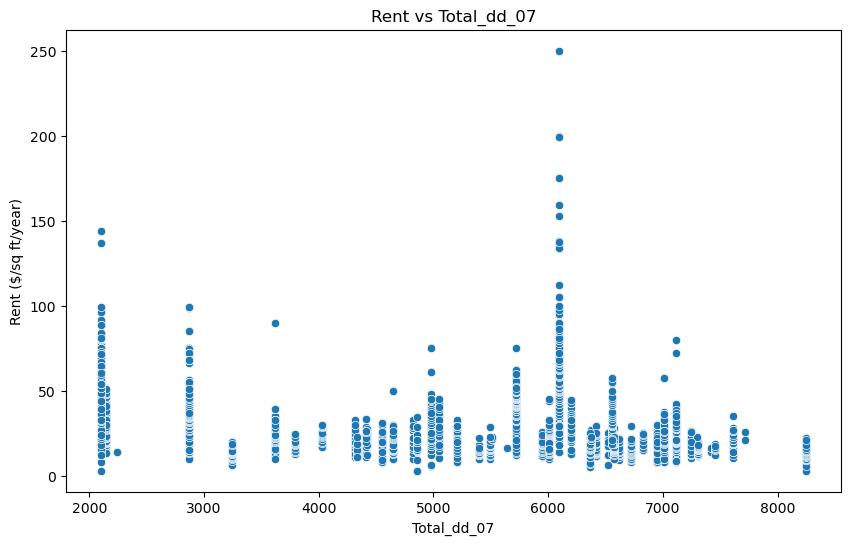

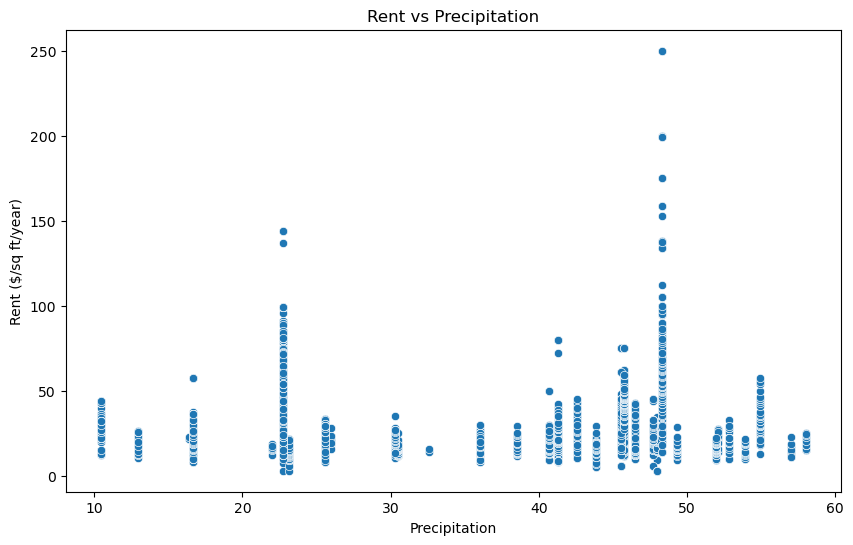

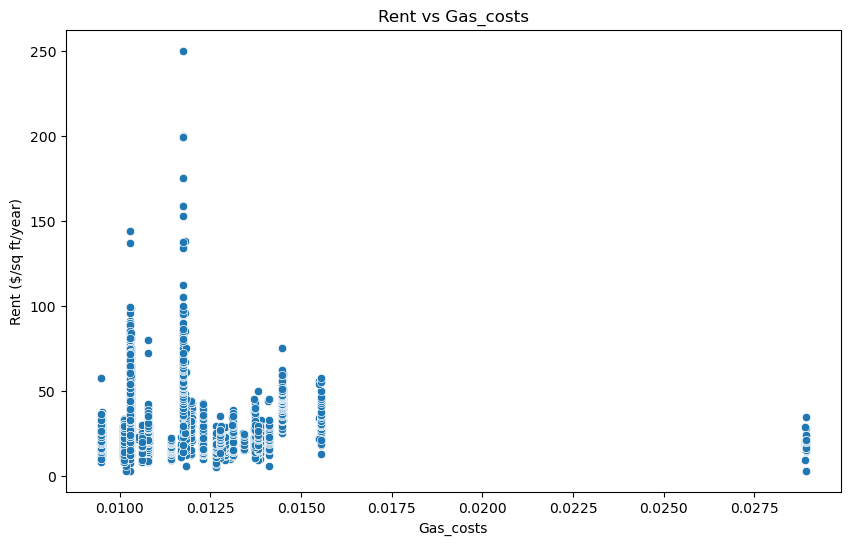

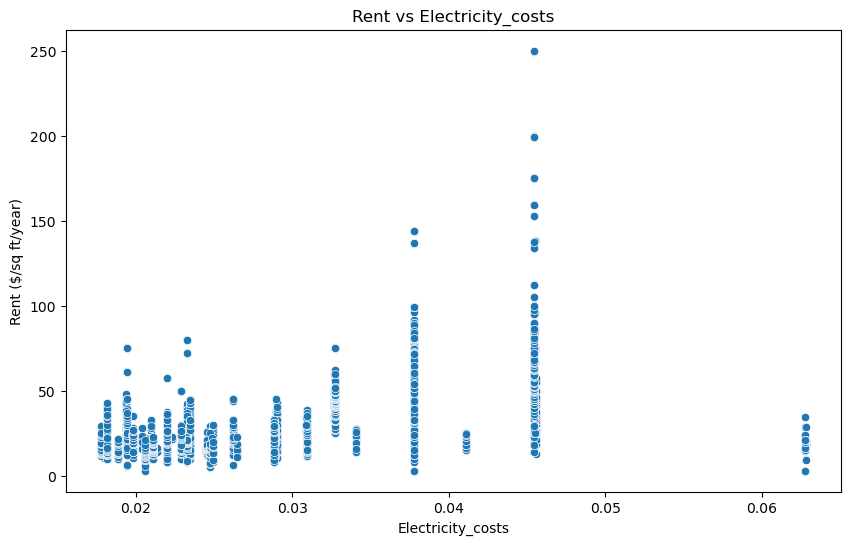

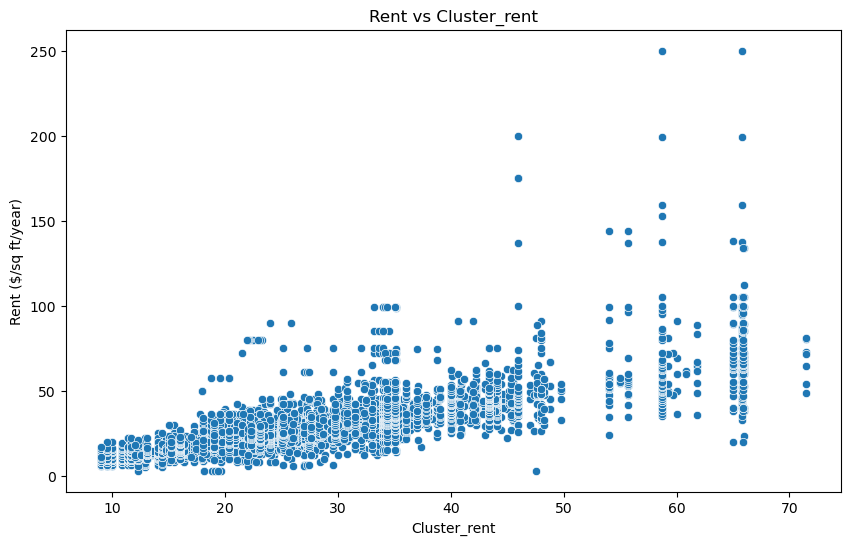

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected variables to plot against Rent
selected_variables = ['size', 'empl_gr', 'leasing_rate', 'stories', 'age', 'cluster', 'cd_total_07', 'hd_total07', 'total_dd_07',
                      'Precipitation', 'Gas_Costs', 'Electricity_Costs', 'cluster_rent']


# Iterate through selected variables and create plots
for variable in selected_variables:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=variable, y='Rent', data=df_clean)
    plt.title(f'Rent vs {variable.capitalize()}')
    plt.xlabel(variable.capitalize())
    plt.ylabel('Rent ($/sq ft/year)')

    # Calculate median rent value for the current variable
    median_rent = df_clean['Rent'].median()

    # Calculate valid y position for data labels
    y_pos = df_clean['Rent'].max() + 1

    plt.show()

Overall, we can say that the rent has a positive relationship with leasing rate and cluster rent.

### Now, let's look at the categorical variables:

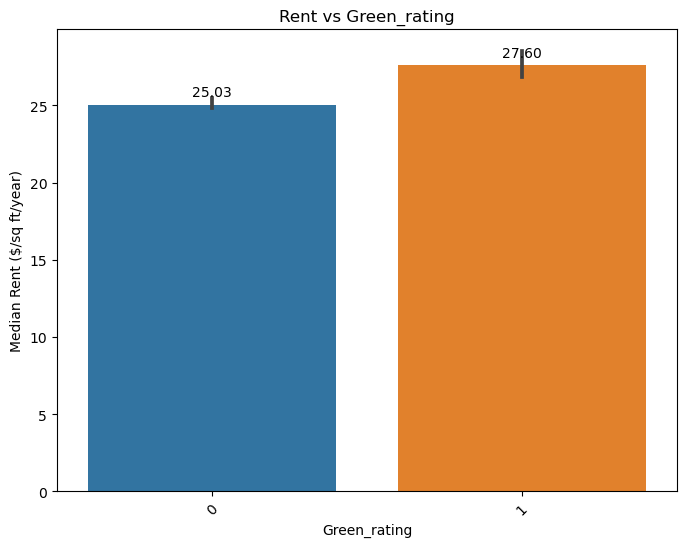

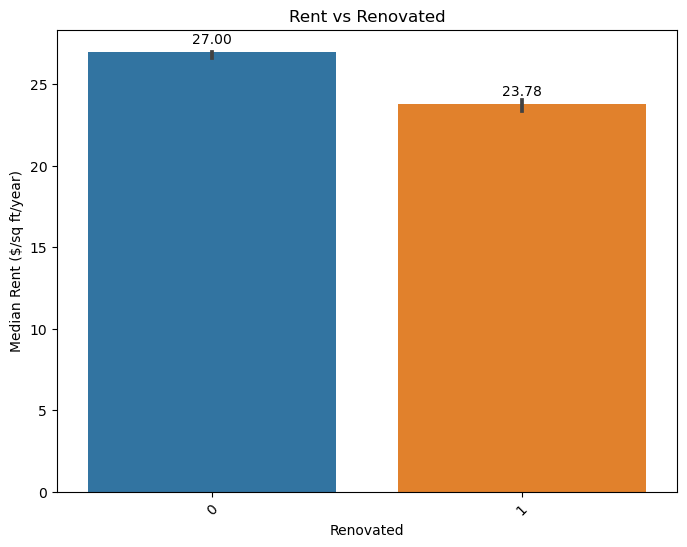

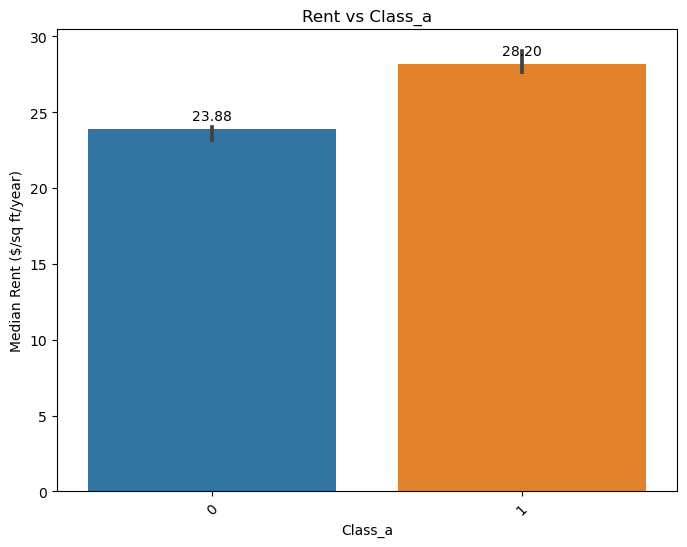

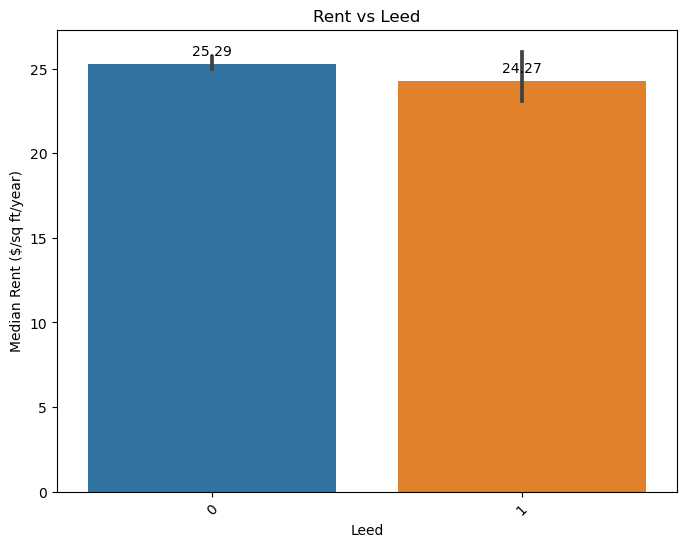

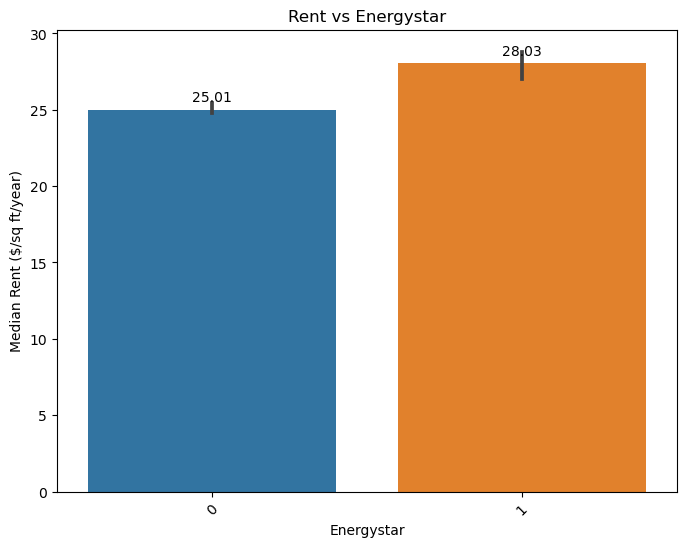

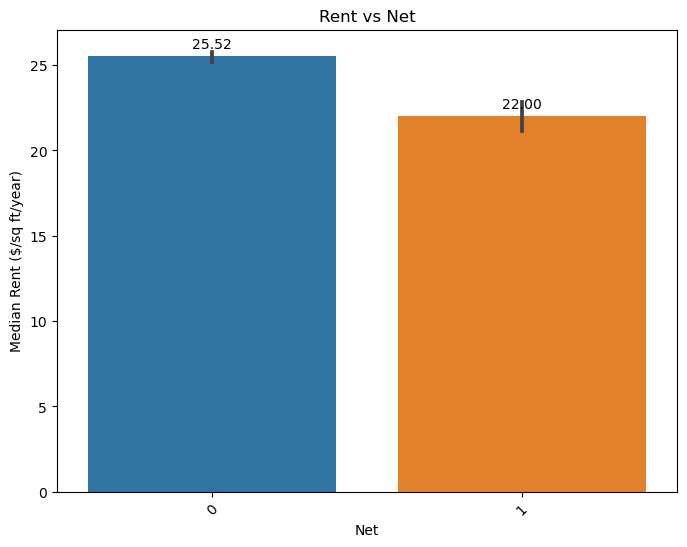

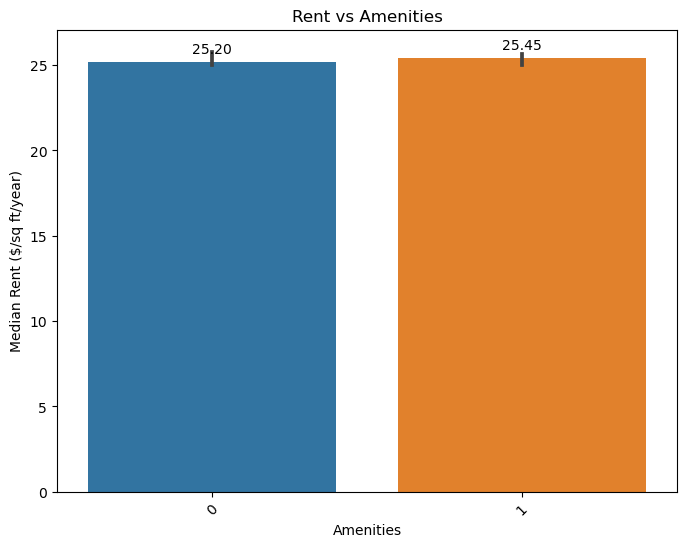

In [18]:
import numpy as np

# Selected categorical variables to plot against Rent
categorical_variables = ['green_rating', 'renovated', 'class_a', 'LEED', 'Energystar', 'net', 'amenities']

# Iterate through selected categorical variables and create bar plots
for variable in categorical_variables:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=variable, y='Rent', data=df_clean, estimator=np.median)
    plt.title(f'Rent vs {variable.capitalize()}')
    plt.xlabel(variable.capitalize())
    plt.ylabel('Median Rent ($/sq ft/year)')
    plt.xticks(rotation=45)

    # Add data labels above each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    plt.show()

### From the above graphs we can draw the following conclusions: 
    
Renovated buildings draw lower rent

Class a buildings draw higher rent

Buildings with net contract draw lower rent

### Now, we can check the following hypothesis to see if something else is causing the higher median rent in case of green buildings:

Are non-renovated building over-represented among Green buildings?

Are Class a buildings over-represented among green buildings?

Are buildings with net contract under-represented among green buildings?

### Let's start with renovated vs non-renovated

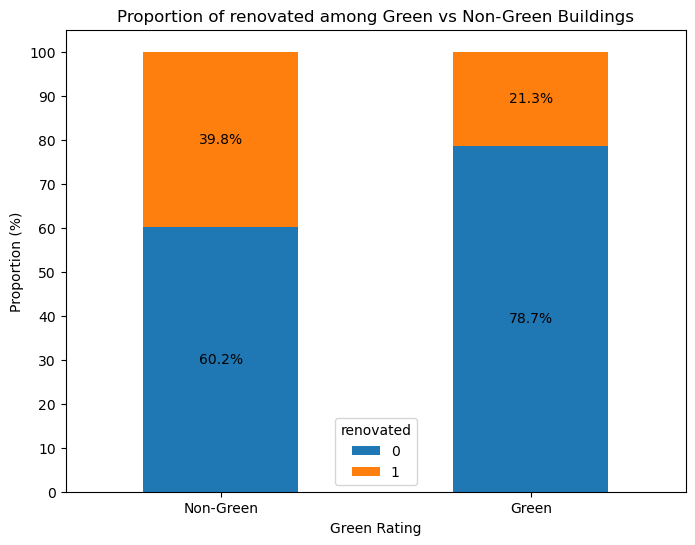

In [30]:
# Create a DataFrame to calculate proportions
prop_df = df_clean.groupby(['green_rating', 'renovated']).size().unstack(fill_value=0)
prop_df = prop_df.div(prop_df.sum(axis=1), axis=0) * 100  # Convert to proportions

# Plot proportion of 'net' with data labels
ax = prop_df.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Proportion of renovated among Green vs Non-Green Buildings')
plt.xlabel('Green Rating')
plt.ylabel('Proportion (%)')
plt.xticks([0, 1], ['Non-Green', 'Green'], rotation=0)
plt.legend(title='renovated', labels=['0', '1'])
plt.yticks(range(0, 101, 10))

# Add data labels to each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

So, non-green buildings have much higher proportion og renovated buildings which draw lower rent

### Let's look at Class_a

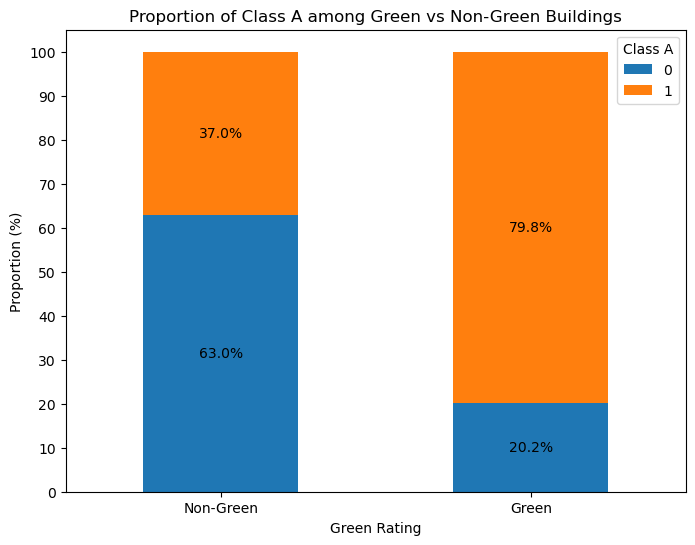

In [38]:
# Create a DataFrame to calculate proportions
prop_df = df_clean.groupby(['green_rating', 'class_a']).size().unstack(fill_value=0)
prop_df = prop_df.div(prop_df.sum(axis=1), axis=0) * 100  # Convert to proportions

# Plot proportion of 'net' with data labels
ax = prop_df.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Proportion of Class A among Green vs Non-Green Buildings')
plt.xlabel('Green Rating')
plt.ylabel('Proportion (%)')
plt.xticks([0, 1], ['Non-Green', 'Green'], rotation=0)
plt.legend(title='Class A', labels=['0', '1'])
plt.yticks(range(0, 101, 10))

# Add data labels to each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

Disproportionate majority of Green buildings are Class A

### Net Contract

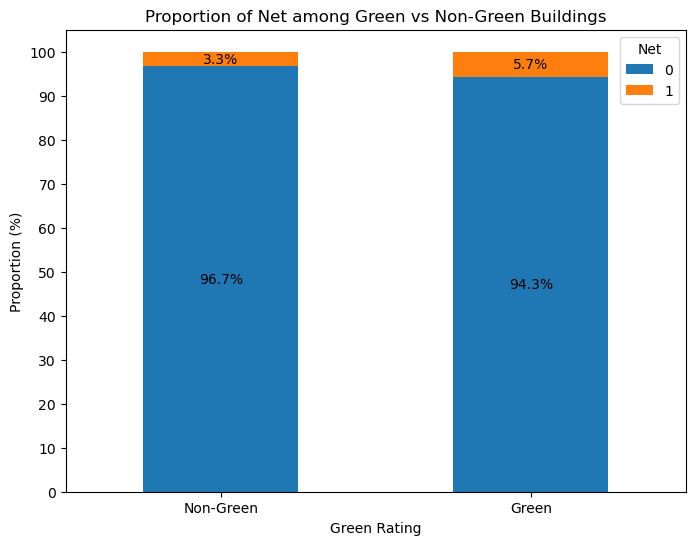

In [29]:
# Create a DataFrame to calculate proportions
prop_df = df_clean.groupby(['green_rating', 'net']).size().unstack(fill_value=0)
prop_df = prop_df.div(prop_df.sum(axis=1), axis=0) * 100  # Convert to proportions

# Plot proportion of 'net' with data labels
ax = prop_df.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Proportion of Net among Green vs Non-Green Buildings')
plt.xlabel('Green Rating')
plt.ylabel('Proportion (%)')
plt.xticks([0, 1], ['Non-Green', 'Green'], rotation=0)
plt.legend(title='Net', labels=['0', '1'])
plt.yticks(range(0, 101, 10))

# Add data labels to each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()

No major difference in net contract buildings between green and non-green buildings

### So, we can safely conclude that the overrepresentation of Class A buildings among the Green buildings are probably causing the median rent of the latter to inflate.

### In order to adjust for such a confounder we can look specifically at the median rent among non-class a buildings within Green and non-Green buildings

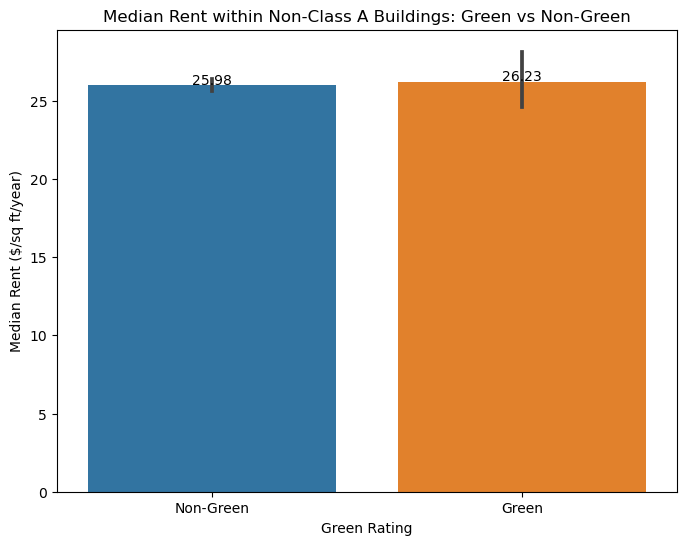

In [35]:
# Filter non-Class A buildings
non_class_a_df = df_clean[df_clean['class_a'] == 0]

# Plot median rent within non-Class A buildings
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='green_rating', y='Rent', data=non_class_a_df)
plt.title("Median Rent within Non-Class A Buildings: Green vs Non-Green")
plt.xlabel("Green Rating")
plt.ylabel("Median Rent ($/sq ft/year)")
plt.xticks([0, 1], ['Non-Green', 'Green'])

# Add data labels to the bars
for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{height:.2f}', ha='center')

plt.show()

When we look at non-Class A buildings, the Green buildings are only $0.25/sq ft/year higher than the non-Green buildings. If we multiply that by 250,000 sq.ft. we get:

In [36]:
print("$", 0.25*250000, "/year")

$ 62500.0 /year


In [ ]:
If we now divide the premium of $5 million by $62,500, we get:

In [37]:
print(5000000/62500, "years")

80.0 years


### It would take 80 years to recuperate the costs incurred to get Green certification which does not seem to be a viable deal. Thus, the project is not worth from an economic perspective.